<a href="https://colab.research.google.com/github/liyaSileshi/amharic-sentiment-analysis/blob/main/tweet_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
pd.options.mode.chained_assignment = None
import re

## Downloading the dataset

In [2]:
url = "https://raw.githubusercontent.com/liyaSileshi/amharic-sentiment-analysis/main/data_preprocess/test.csv"
df_test = pd.read_csv(url)
df_test

,Unnamed: 0,tweet_id,sentiment,tweet
0,0,1213842050455654402,neutral,@Haymana_ እንደዛ ካልሆነ በስተቀር ሰውዬው ማንንም አይቦልኩም
1,1,1215480766295171072,neutral,NaN
2,2,1222950264812064768,positive,ለመገናኛ ብዙሃን አባላት!\n\nበደምቢዶሎ የታገቱ ኢትዮጵያውያን ድምፅ ለ...
3,3,1213967203076395009,negative,NaN
4,4,1213961696840171521,neutral,NaN
...,...,...,...,...
934,934,1214922390469324802,neutral,@degu_zerihun የውስጥ ሰለማችን መጠበቅ፣ የልማታችን ሁሉ ወሳኝ ማ...
935,935,1214922390469324802,neutral,@degu_zerihun የውስጥ ሰለማችን መጠበቅ፣ የልማታችን ሁሉ ወሳኝ ማ...
936,936,1223053757883260928,positive,"""አዲሱ መንግስት""ና ህገ-መንግስታዊነት - ረዥም ገመድ\n\nህገ-መንግስታ..."
937,937,1213771045070659584,negative,@TeameYitbarek @Ze_Astegoma @eskinder_nega ትግሬ...


## Data Pre-Processing and Cleaning

In [3]:
def clean_df(df):
  # remove null values from dataset
  df = df.dropna()
  #drop repeated rows (drop rows with similar tweet id)
  df = df.drop_duplicates(subset='tweet_id', keep="first")
  df = df.reset_index(drop=True)
  return df
df_test = clean_df(df_test)

In [4]:
def clean_text(row, options):

    if options['lowercase']:
        row = row.lower()

    # if options['decode_html']:
    #     txt = BeautifulSoup(row, 'lxml')
    #     row = txt.get_text()

    if options['remove_url']:
        row = row.replace('http\S+|www.\S+', '')

    if options['remove_mentions']:
        row = re.sub("@[A-Za-z0-9_]+","", row)

    if options['demojify']:
      regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
      row = regrex_pattern.sub(r'',row)

    return row

clean_config = {
    'remove_url': True,
    'remove_mentions': True,
    # 'decode_utf8': True,
    'lowercase': True,
    'demojify': True
    }

df_test['tweet'] = df_test['tweet'].apply(clean_text, args=(clean_config,))


In [5]:
df_test

,Unnamed: 0,tweet_id,sentiment,tweet
0,0,1213842050455654402,neutral,እንደዛ ካልሆነ በስተቀር ሰውዬው ማንንም አይቦልኩም
1,2,1222950264812064768,positive,ለመገናኛ ብዙሃን አባላት!\n\nበደምቢዶሎ የታገቱ ኢትዮጵያውያን ድምፅ ለ...
2,5,1213760822964609024,positive,የምወድሽ፣\nየምሳሳልሽ፣\nእናቴ፣\nሃገሬ፣ \nኢትዮጵያ!\nከላይ አረንጓ...
3,6,1201134046862094336,positive,rt : የዚህ ቤት ከፍለን የማንጨርሰው ውለታ አለብን \nthe best p...
4,7,1214129980306808834,neutral,ልሙጦቹ ... ደግሞ ምን ይደረግላችሁ በበአሉ?
...,...,...,...,...
547,931,1216256678808735744,neutral,• ከታች ያለው አማራ ክልል ነው! እዚያ አዲሥ ናቸው መሠለኝ ብሩን እያተ...
548,933,1214922390469324802,neutral,የውስጥ ሰለማችን መጠበቅ፣ የልማታችን ሁሉ ወሳኝ ማዕከል ነው። የሰላም ...
549,936,1223053757883260928,positive,"""አዲሱ መንግስት""ና ህገ-መንግስታዊነት - ረዥም ገመድ\n\nህገ-መንግስታ..."
550,937,1213771045070659584,negative,ትግሬ ማለትህ ነው በምቀኝነት የገማቹህ ህዝቦች አናሳ


## Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
df_test['tweet'] = df_test['tweet'].apply(word_tokenize)

In [ ]:
# import com.johnsnowlabs.nlp.DocumentAssembler
# import com.johnsnowlabs.nlp.annotator.NorvigSweetingModel
# import com.johnsnowlabs.nlp.annotators.Tokenizer
# import org.apache.spark.ml.Pipeline
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

In [15]:
import pandas as pd
import numpy as np
import json
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from sparknlp.annotator import *
from sparknlp.base import *
import sparknlp
from sparknlp.pretrained import PretrainedPipeline


In [17]:
#initialize spark context
spark = sparknlp.start()


https://www.kdnuggets.com/2019/11/spark-nlp-101-lightpipeline.html
fullAnnotate() returns the content and metadata in Annotation type. According to documentation, the Annotation type has the following attributes:
```
annotatorType: String, 
begin: Int, 
end: Int, 
result: String, (this is what annotate returns)
metadata: Map[String, String], 
embeddings: Array[Float]
```

In [43]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = Tokenizer()\
        .setInputCols("document")\
        .setOutputCol("token")

lemmatizer = LemmatizerModel.pretrained("lemma", "am") \
        .setInputCols(["token"]) \
        .setOutputCol("lemma")

nlp_pipeline = Pipeline(stages=[document_assembler, tokenizer, lemmatizer])
light_pipeline = LightPipeline(nlp_pipeline.fit(spark.createDataFrame([[""]]).toDF("text")))
results = light_pipeline.fullAnnotate(["መጽሐፉን መጽሐፍ ኡ ን አስያዛት አስያዝ ኧ ኣት መጽሐፍ ።"])

lemma download started this may take some time.
Approximate size to download 36 KB
[OK!]


In [53]:
results[0]['document']

[Annotation(document, 0, 36, መጽሐፉን መጽሐፍ ኡ ን አስያዛት አስያዝ ኧ ኣት መጽሐፍ ።, {})]

In [54]:
#extracting the result from the metadata
results[0]['document'][0].result

'መጽሐፉን መጽሐፍ ኡ ን አስያዛት አስያዝ ኧ ኣት መጽሐፍ ።'

In [45]:
results[0]['token']

[Annotation(token, 0, 4, መጽሐፉን, {'sentence': '0'}),
 Annotation(token, 6, 9, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 11, 11, ኡ, {'sentence': '0'}),
 Annotation(token, 13, 13, ን, {'sentence': '0'}),
 Annotation(token, 15, 19, አስያዛት, {'sentence': '0'}),
 Annotation(token, 21, 24, አስያዝ, {'sentence': '0'}),
 Annotation(token, 26, 26, ኧ, {'sentence': '0'}),
 Annotation(token, 28, 29, ኣት, {'sentence': '0'}),
 Annotation(token, 31, 34, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 36, 36, ።, {'sentence': '0'})]

In [46]:
results[0]['lemma']

[Annotation(token, 0, 4, _, {'sentence': '0'}),
 Annotation(token, 6, 9, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 11, 11, ኡ, {'sentence': '0'}),
 Annotation(token, 13, 13, ን, {'sentence': '0'}),
 Annotation(token, 15, 19, _, {'sentence': '0'}),
 Annotation(token, 21, 24, አስያዝ, {'sentence': '0'}),
 Annotation(token, 26, 26, ኧ, {'sentence': '0'}),
 Annotation(token, 28, 29, ኣት, {'sentence': '0'}),
 Annotation(token, 31, 34, መጽሐፍ, {'sentence': '0'}),
 Annotation(token, 36, 36, ።, {'sentence': '0'})]

## Create wordcloud

In [ ]:
!pip3 install langdetect

In [11]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
# import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
def create_wordcloud(text):
#  mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
#  mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))



Word Cloud Saved Successfully


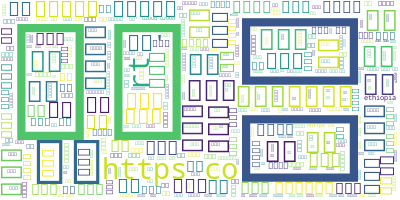

In [18]:
#Creating wordcloud for all tweets
create_wordcloud(df_test["tweet"].values)

text vectorization on amharic dataset

# character level normalization

In [56]:
#character level normalization
# https://github.com/IsraelAbebe/An-Amharic-News-Text-classification-Dataset/blob/main/Amharic-News-Text-classification-Baseline.ipynb


In [58]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
    return rep48

In [59]:
df_test['tweet'] = df_test['tweet'].apply(lambda x: normalize_char_level_missmatch(x))

In [60]:
df_test

,Unnamed: 0,tweet_id,sentiment,tweet
0,0,1213842050455654402,neutral,እንደዛ ካልሆነ በስተቀር ሰውዬው ማንንም አይቦልኩም
1,2,1222950264812064768,positive,ለመገናኛ ብዙሀን አባላት!\n\nበደምቢዶሎ የታገቱ ኢትዮጵያውያን ድምፅ ለ...
2,5,1213760822964609024,positive,የምወድሽ፣\nየምሳሳልሽ፣\nእናቴ፣\nሀገሬ፣ \nኢትዮጵያ!\nከላይ አረንጓ...
3,6,1201134046862094336,positive,rt : የዚህ ቤት ከፍለን የማንጨርሰው ውለታ አለብን \nthe best p...
4,7,1214129980306808834,neutral,ልሙጦቹ ... ደግሞ ምን ይደረግላችሁ በበአሉ?
...,...,...,...,...
547,931,1216256678808735744,neutral,• ከታች ያለው አማራ ክልል ነው! እዚያ አዲስ ናቸው መሰለኝ ብሩን እያተ...
548,933,1214922390469324802,neutral,የውስጥ ሰለማችን መጠበቅ፣ የልማታችን ሁሉ ወሳኝ ማእከል ነው። የሰላም ...
549,936,1223053757883260928,positive,"""አዲሱ መንግስት""ና ህገ-መንግስታዊነት - ረዥም ገመድ\n\nህገ-መንግስታ..."
550,937,1213771045070659584,negative,ትግሬ ማለትህ ነው በምቀኝነት የገማቹህ ህዝቦች አናሳ
